# Base Census
**Preveja se a renda excede US$ 50 mil/ano com base nos dados do censo. Também conhecido como conjunto de dados "Renda do Censo".**  

A extração foi feita por Barry Becker do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))  

A tarefa de previsão é determinar se uma pessoa faz mais de 50K ano.  

https://archive.ics.uci.edu/ml/datasets/adult

# #1 Exploração da base de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
path_datasets = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Machine Learning e Data Science com Python de A à Z/Bases de dados/'

In [3]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)
df_census = pd.read_csv(path_datasets+'census.csv')
df_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Informações do dataset
- age (idade): numérica discreta
- workclass (classe de trabalho): categórico nominal
- final-weight (pontuação): numérico contínua
- education (estudo): categorico ordinnal
- education-num (anos de estudo): numérico discreta
- marital-status (estado civil): categórica nominal
- occupation (ocupação): categórica nominal
- relationship (relacionamento): categórica nominal
- race (raça): categórica nominal
- sex (sexo): categórica nominal
- capital-gain (ganho de capital): numérico contínua
- capital-loss (perda de capital): numérico contínua
- hour-per-week (horas-por-semana): numérico discreto
- native-country (país de origem): categórica nominal
- income (renda): categórica ordinal

OBS: **final-weight** é o número de pessoas que o censo acredita que a entrada representa. 

O conjunto de dados não possuem registros nulos.

In [4]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Probabilidade de acertar o target de modo aleatório

In [6]:
less_or_equal_than_50k = df_census.groupby(by = 'income').size()[0]
more_than_50k          = df_census.groupby(by = 'income').size()[1]
prob_less_50 = round( less_or_equal_than_50k / (less_or_equal_than_50k + more_than_50k), 2 ) * 100
prob_more_50 = round( more_than_50k / (less_or_equal_than_50k + more_than_50k), 2 ) * 100

print(f'Probabilidade de acertar a classe <=50K: {prob_less_50}%\nProbabilidade de acertar a classe >50K: {prob_more_50}%')

Probabilidade de acertar a classe <=50K: 76.0%
Probabilidade de acertar a classe >50K: 24.0%


## Dados estatísticos agrupados por renda
- Em média, as pessoas com renda > 50K por ano estudaram até

In [48]:
df_census.groupby('income')[df_census.select_dtypes(include=['int64']).columns].agg(['min', 'max','median','mean'])

age                       final-weight                     \
       min max median       mean          min      max    median   
income                                                             
 <=50K  17  90   34.0  36.783738        12285  1484705  179465.0   
 >50K   19  90   44.0  44.249841        14878  1226583  176101.0   

                     education-num                       capital-gain         \
                mean           min max median       mean          min    max   
income                                                                         
 <=50K  190340.86517             1  16    9.0   9.595065            0  41310   
 >50K   188005.00000             2  16   12.0  11.611657            0  99999   

                           capital-loos                           \
       median         mean          min   max median        mean   
income                                                             
 <=50K    0.0   148.752468            0  4356    0.0   53.142921   
 >50K     0.0  4006.142456            0  3683    0.0  195.001530   

       hour-per-week                        
                 min max median       mean  
income                                      
 <=50K             1  99   40.0  38.840210  
 >50K              1  99   40.0  45.473026

## Visualizar quantidade de valores categóricos distintos

In [7]:
for column in df_census.select_dtypes(include=['object']).columns:
  print(f'{column}: {df_census[column].nunique()} valores distintos')
  print('--------------------------------------------')

workclass: 9 valores distintos
--------------------------------------------
education: 16 valores distintos
--------------------------------------------
marital-status: 7 valores distintos
--------------------------------------------
occupation: 15 valores distintos
--------------------------------------------
relationship: 6 valores distintos
--------------------------------------------
race: 5 valores distintos
--------------------------------------------
sex: 2 valores distintos
--------------------------------------------
native-country: 42 valores distintos
--------------------------------------------
income: 2 valores distintos
--------------------------------------------


## Visualizar distribuição dos dados numéricos
Os dados não possuem uma distribuição normal.

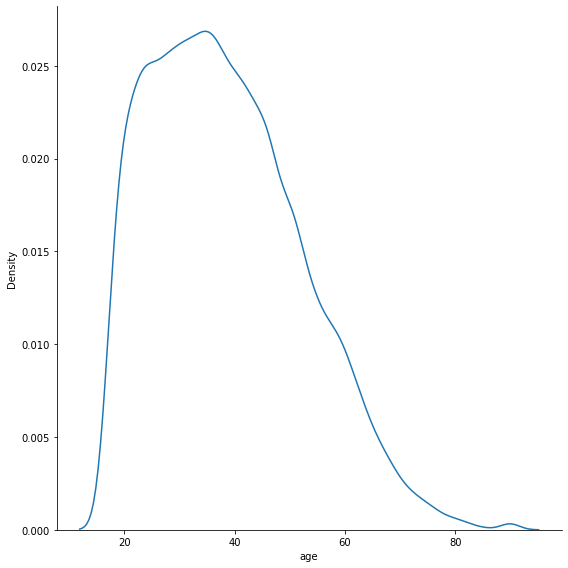

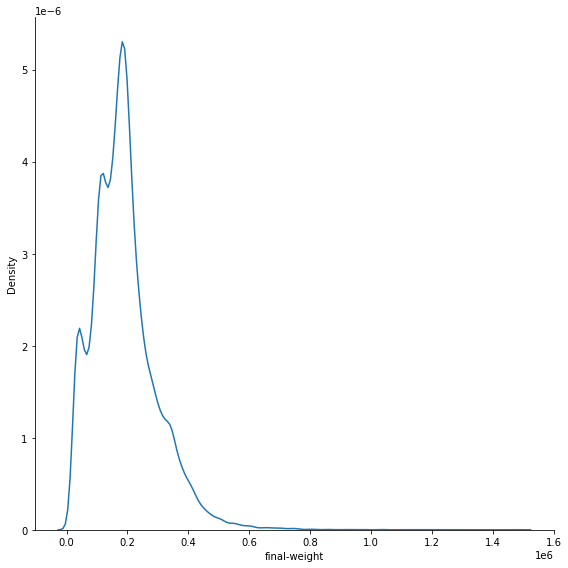

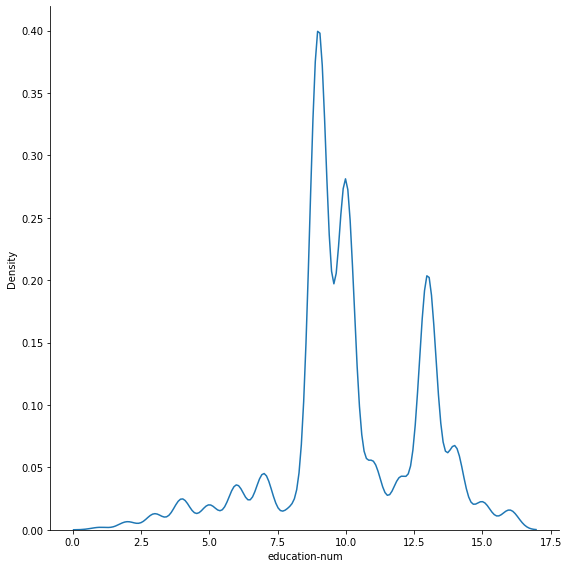

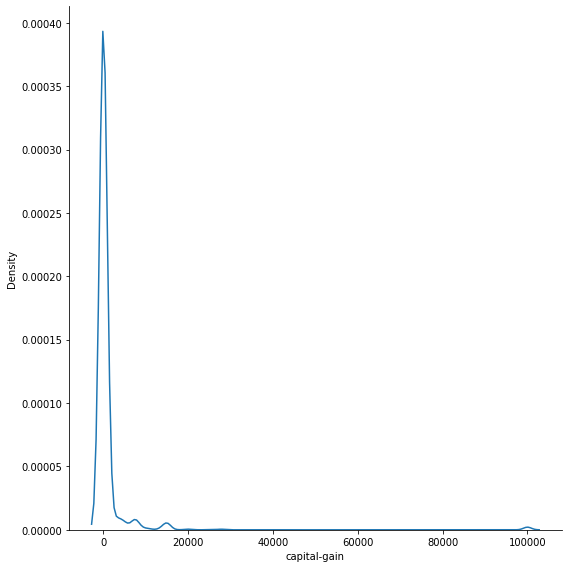

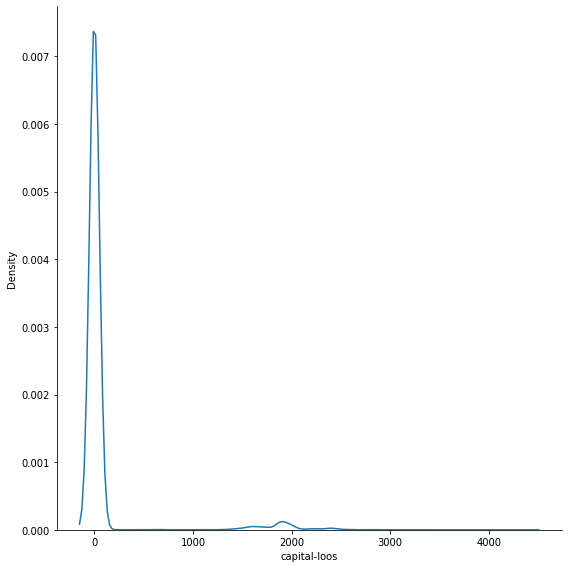

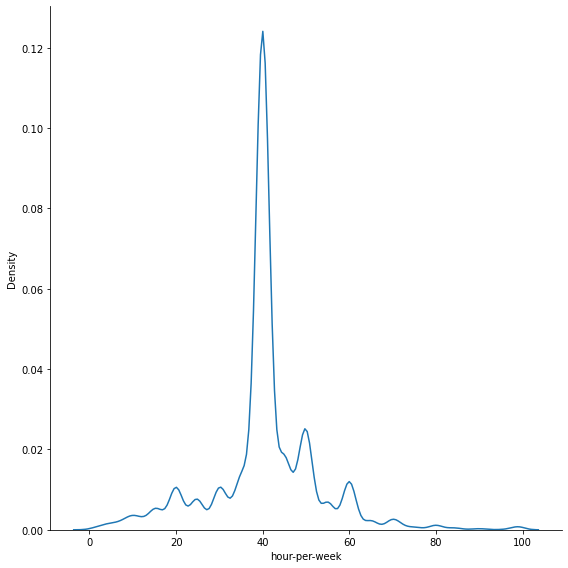

In [8]:
census_num = df_census.select_dtypes(include=['int64']).columns

for column in census_num:
  sns.displot(data = df_census, x = column, kind = 'kde', height = 8);

## Visualizar correlação entre dados
Os dados não estão correlacionados

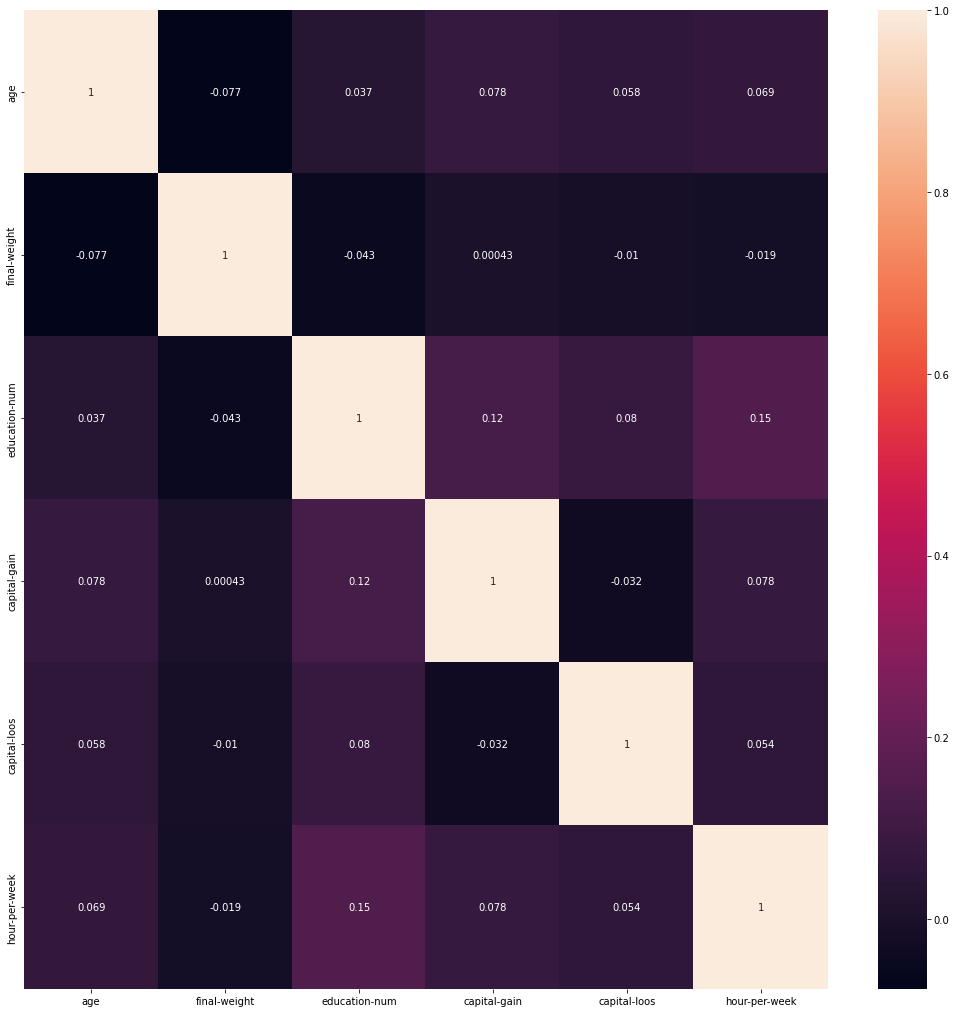

In [9]:
fig = plt.figure(figsize = (18, 18))
sns.heatmap(df_census.corr(), annot = True);

## Visualizar outlier
Os dados possuem muitos outliers

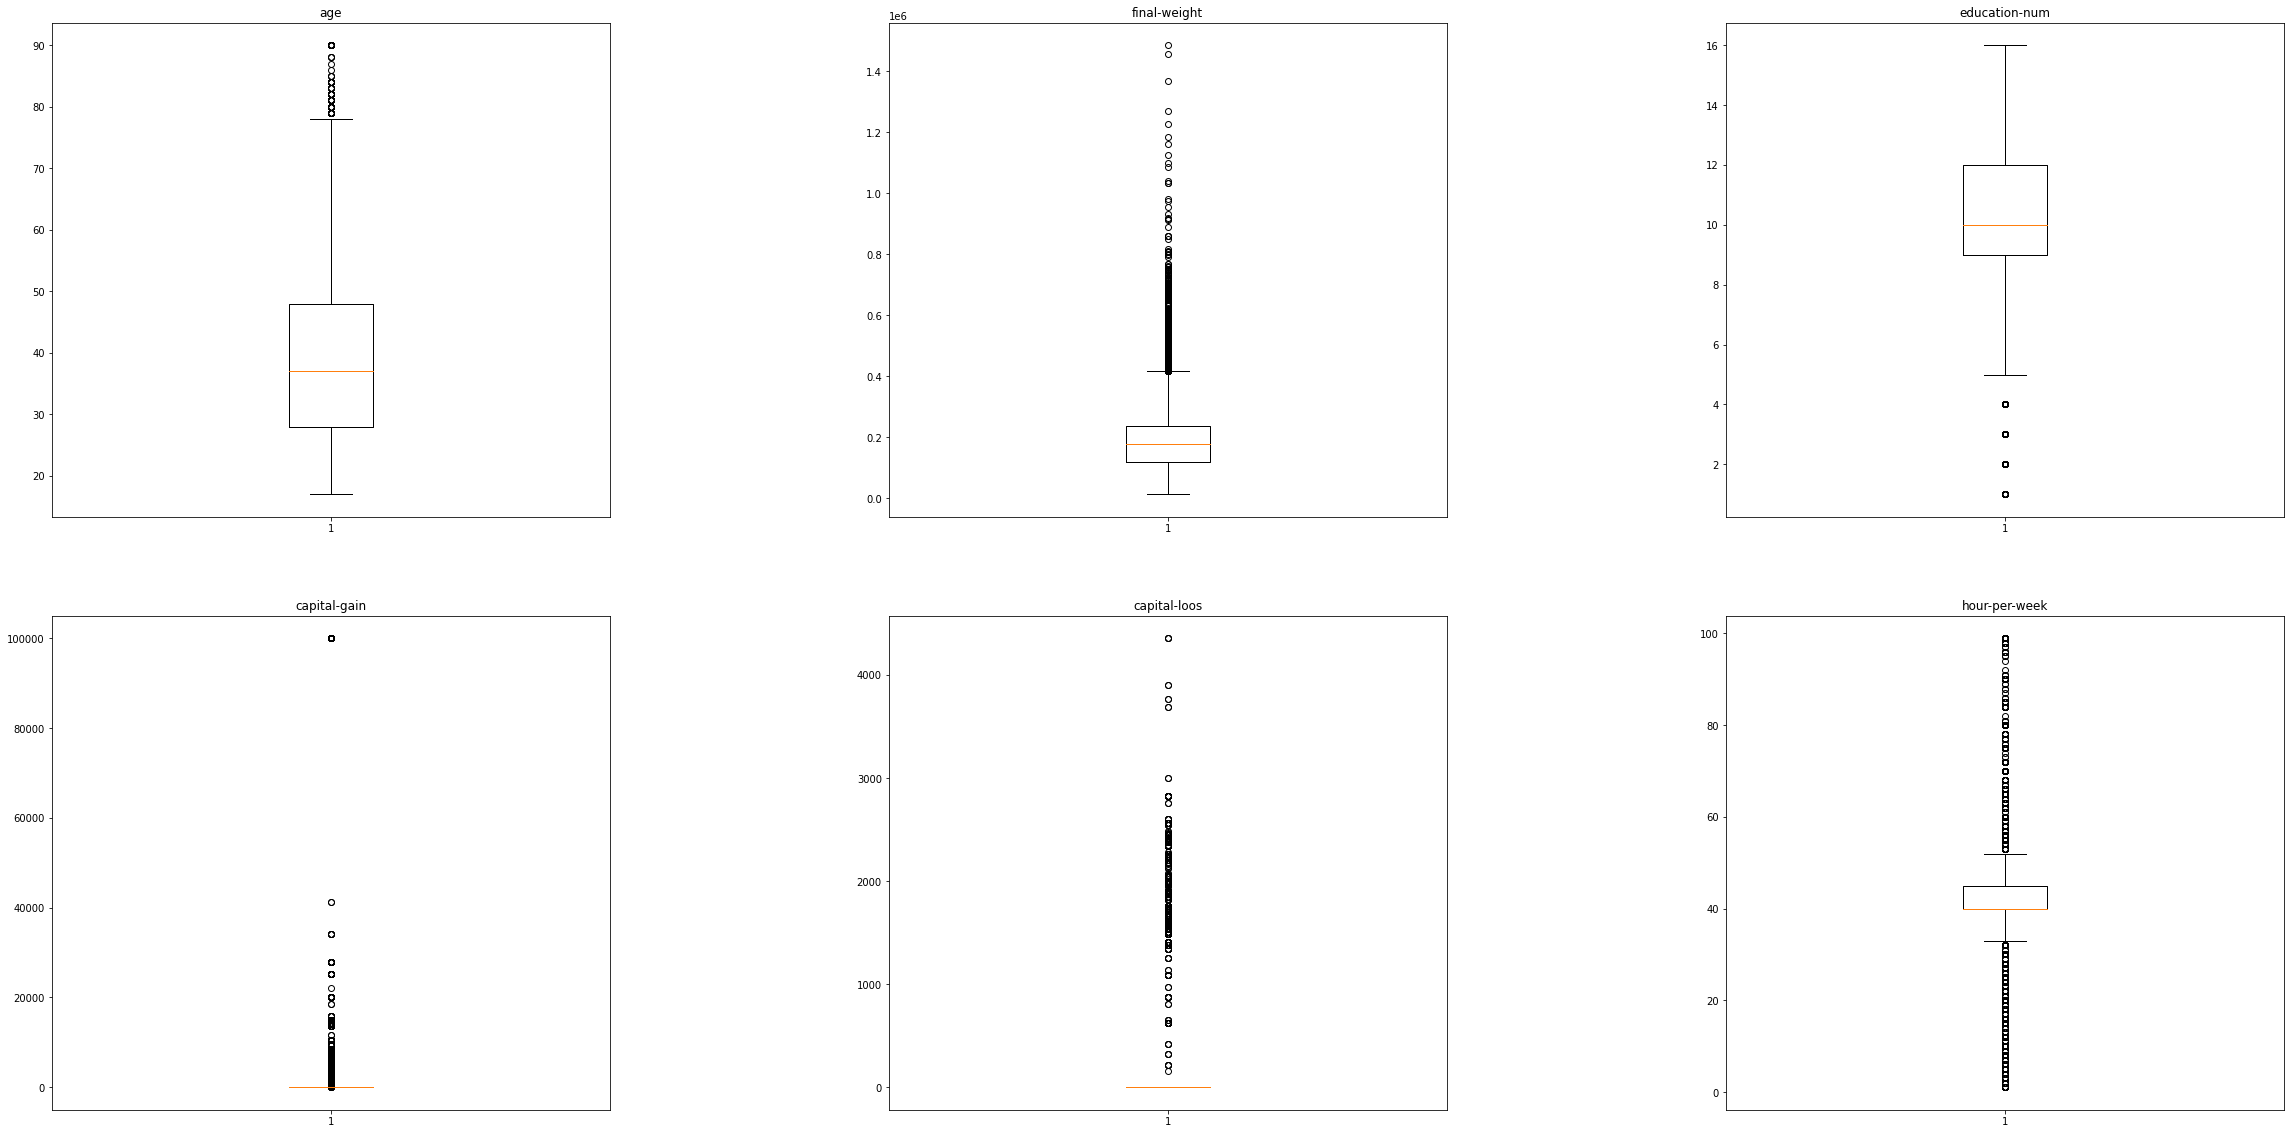

In [10]:
linhas, colunas = 2, 3
fig, axes = plt.subplots(2, 3, figsize=(40, 20)) #3 linhas e 2 colunas | Tam do gráfico 12x12
axes = axes.ravel() # Transformar Matriz em Vetor
for i in np.arange(0, linhas*colunas):
  column = census_num[i]
  axes[i].boxplot(df_census[column])
  axes[i].set_title(column) # Mostrar o título da classe da imagem | Argmax: Retorna o indice com maior valor
plt.subplots_adjust(wspace = 0.5) # Deixar imagens mais espaçadas

## Analisando País de origem

### Visualizar o conjunto de nativos americanos e estrangeiros
Pelo baixo percentual de estrangeiros, seria interessante substituir os valores dos demais países para "Others".

In [11]:
us_native = df_census[ df_census['native-country'] == ' United-States'].shape[0]
not_us_native = df_census[ df_census['native-country'] != ' United-States'].shape[0]

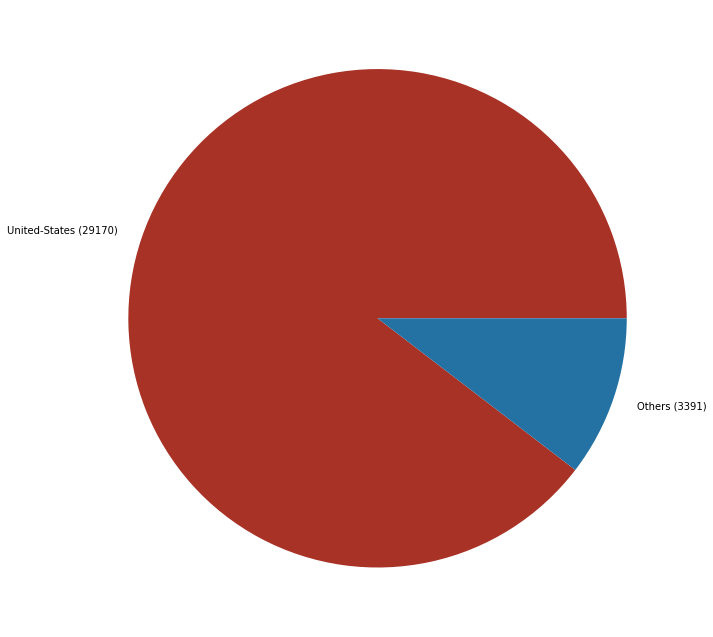

In [12]:
data_native_country = [us_native, not_us_native]
labels = [f'United-States ({us_native})', f'Others ({not_us_native})']
colors = ['#A93226', '#2471A3']

fig = plt.figure(figsize=(10, 10))
patches, texts = plt.pie(data_native_country, labels=labels, colors=colors)

plt.tight_layout()
plt.show()

### Percentual de indivíduos que ganham mais de $50K por ano agrupado por países.
Podemos aplicar um target_encoder na feature de país-nativo, assim, podemos tratá-lo como um atributo numérico ao invés de categórico, assim, reduzindo a dimensionalidade.

In [69]:
native_country_income = {}
for native_country in np.unique(df_census['native-country']):
  native_country_income[native_country] = {' <=50K': 0, ' >50K': 0}

In [70]:
for native_country, income in df_census[['native-country', 'income']].values:
  native_country_income[native_country][income] += 1

del native_country_income[' ?']

In [71]:
country_list = []
income_list  = []
for native_country, income in native_country_income.items():
  country_list.append(native_country)
  income_list.append( round( income[' >50K'] / (income[' >50K']+income[' <=50K']) , 2) )

df_native_country_income = pd.DataFrame({'native_country': country_list, 'income >50K': income_list}).sort_values(by=['income >50K'], ascending = False)
df_native_country_income

,native_country,income >50K
19,Iran,0.42
9,France,0.41
18,India,0.40
35,Taiwan,0.39
23,Japan,0.39
40,Yugoslavia,0.38
0,Cambodia,0.37
21,Italy,0.34
8,England,0.33
10,Germany,0.32


## Visualizar o conjunto de dados agrupados por raça

In [13]:
race_AIE = df_census[ df_census['race'] == ' Amer-Indian-Eskimo'].shape[0]
race_API = df_census[ df_census['race'] == ' Asian-Pac-Islander'].shape[0]
race_B = df_census[ df_census['race'] == ' Black'].shape[0]
race_W = df_census[ df_census['race'] == ' White'].shape[0]
race_O = df_census[ df_census['race'] == ' Other'].shape[0]

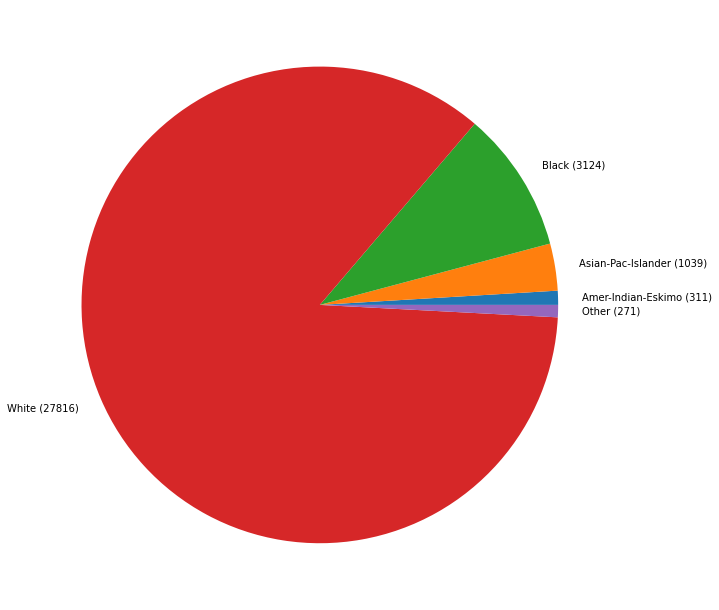

In [14]:
race_data = [race_AIE, race_API, race_B, race_W, race_O]
labels = [f'Amer-Indian-Eskimo ({race_AIE})', f'Asian-Pac-Islander ({race_API})', f'Black ({race_B})', f'White ({race_W})', f'Other ({race_O})']

fig = plt.figure(figsize=(10, 10))
patches, texts = plt.pie(race_data, labels=labels)

plt.tight_layout()
plt.show()

## Histograma de grupo de trabalho agrupado por renda
- Grande parte dos indivíduos trabalham em empresas privadas
- Único grupo de trabalho que possui um percentual maior de indivíduos que ganham mais que 50.000$ por ano são os *self-employed incorporated* (empresários)

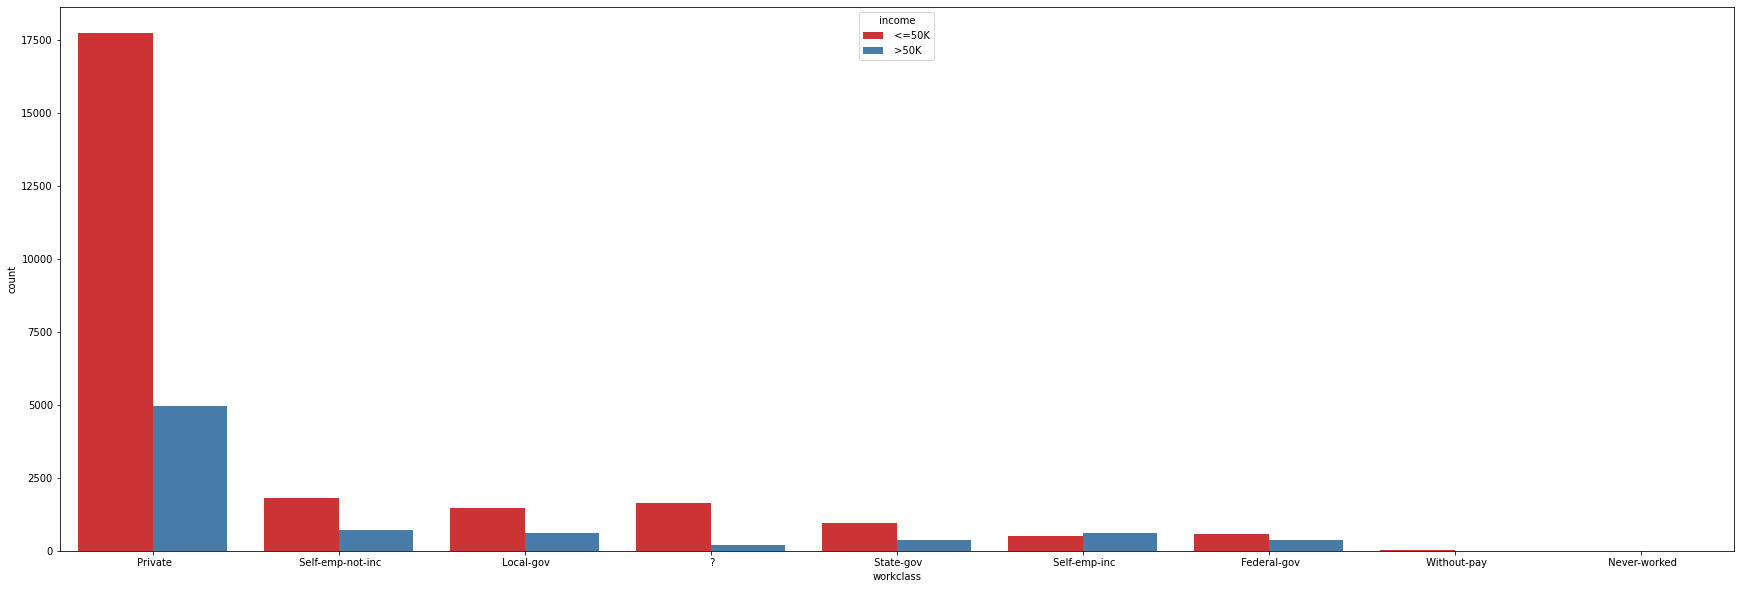

In [15]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'workclass', hue='income', data=df_census, order = df_census['workclass'].value_counts().index, palette = 'Set1');

## Histograma de ocupação agrupado por renda
- Quase metade dos gerentes executivos (*Exec-managerial*) e professores especialistas (*Prof-specialty*) ganham mais que 50.000$ por ano;

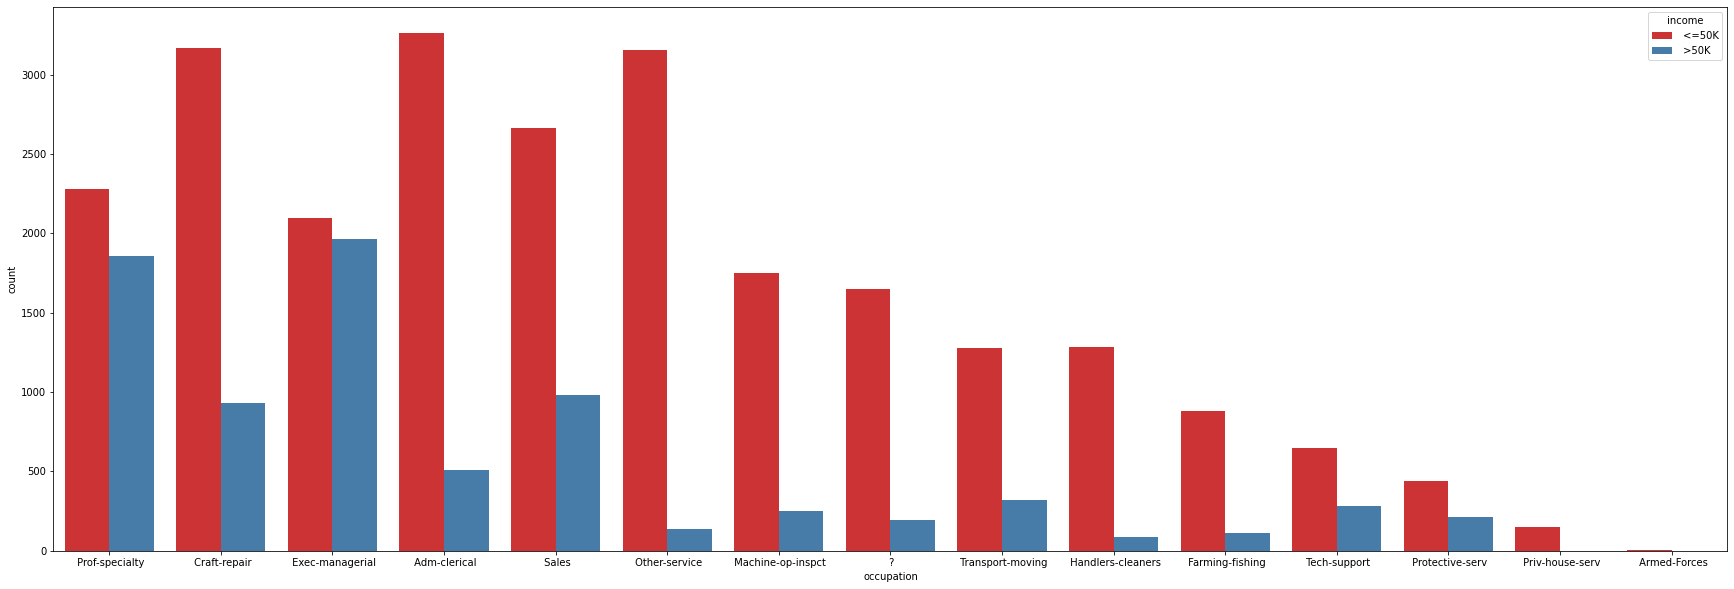

In [16]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'occupation', hue='income', data=df_census, order = df_census['occupation'].value_counts().index, palette = 'Set1');

## Analisando situação civíl

### Histograma de estado-civil agrupado por renda
- Cerda de 45% dos indivíduos que são casados ganham mais de 50.000 anualmente 

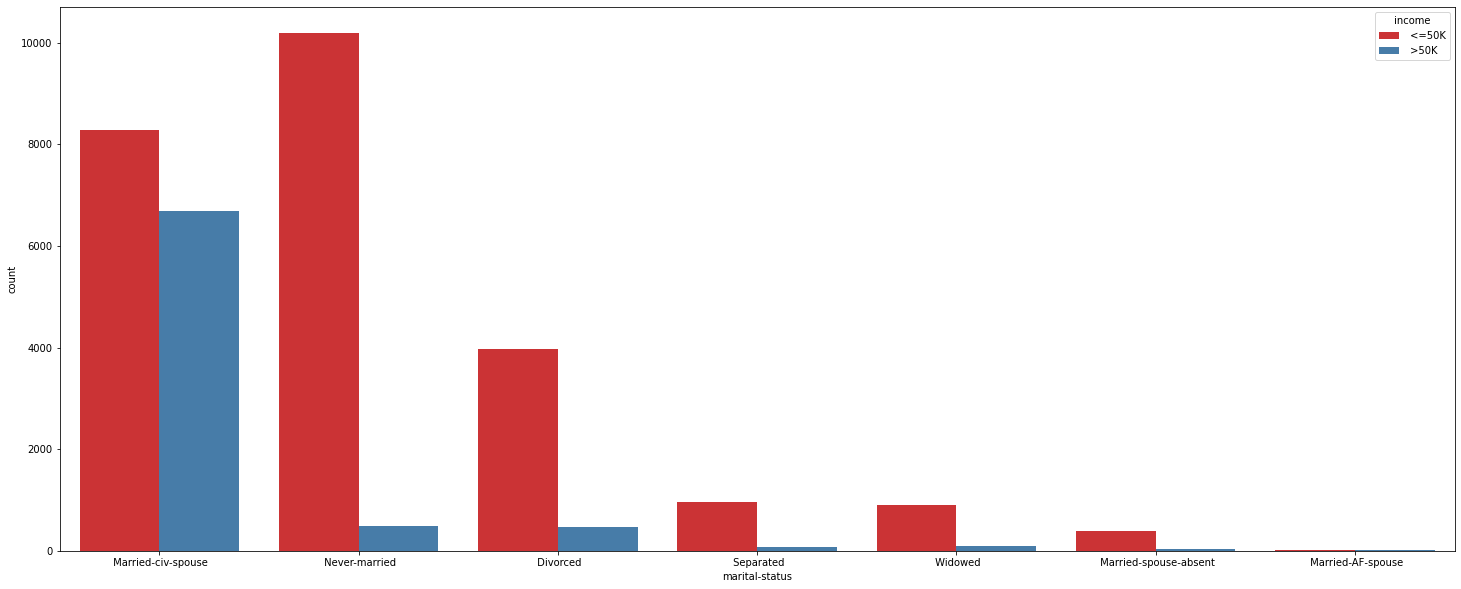

In [17]:
plt.figure(figsize = (25, 10))
sns.countplot(x = 'marital-status', hue='income', data=df_census, order = df_census['marital-status'].value_counts().index, palette = 'Set1');

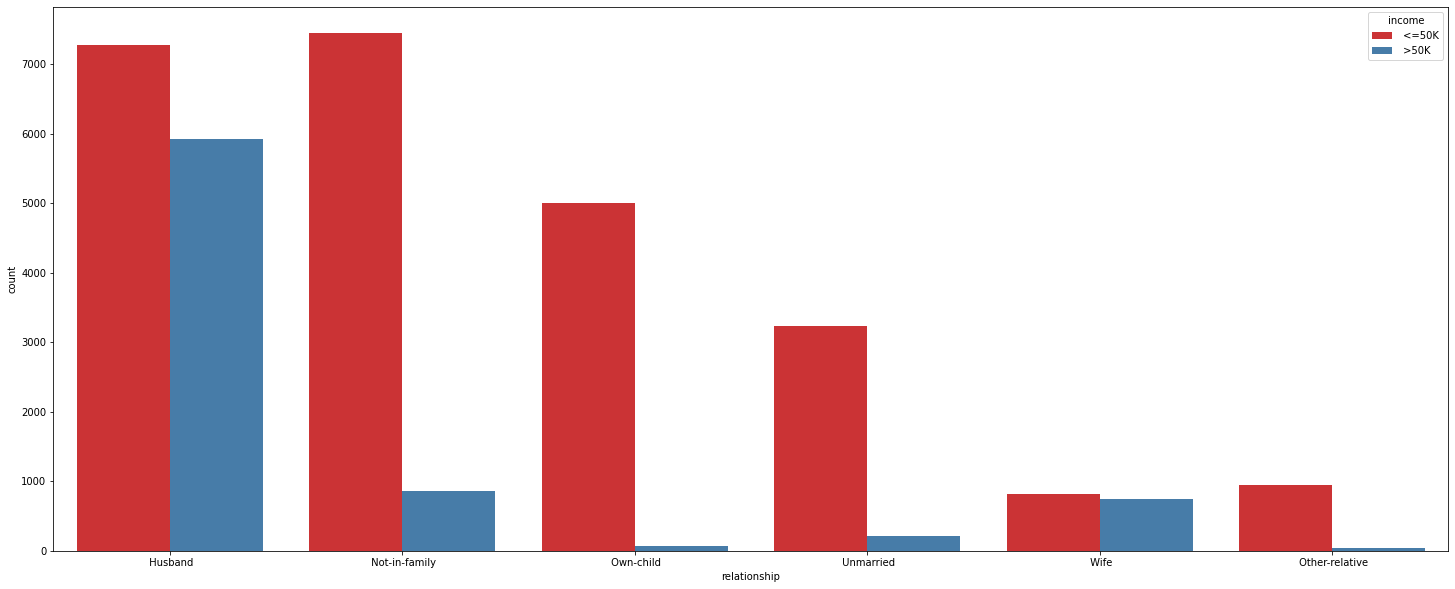

In [18]:
plt.figure(figsize = (25, 10))
sns.countplot(x = 'relationship', hue='income', data=df_census, order = df_census['relationship'].value_counts().index, palette = 'Set1');

### Cruzando variáveis Marital_status x Relationship
Há uma redundância entre Husband/Wife e Married-spouse, não podemos tratar essa relação por que existem outros cruzamentos de variáveis interessantes.
- Existem mais pessoas solteiras que se divorciaram (1601) do que pessoas solteiras que nunca casaram (881)

In [39]:
pd.crosstab(df_census['marital-status'], df_census['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,2404,110,328,1601,0
Married-AF-spouse,9,0,1,1,0,12
Married-civ-spouse,13184,17,124,95,0,1556
Married-spouse-absent,0,211,32,45,130,0
Never-married,0,4706,611,4485,881,0
Separated,0,420,55,99,451,0
Widowed,0,547,48,15,383,0


## Histograma de nível educacional agrupado por renda
- Os quatro maiores níveis educacionais (*Bachelors*, *Masters*, *Prof-school* e *Doctorate*) se destacam no ganho anual, sendo três deles (*Masters*, *Prof-school* e *Doctorate*) possuem um percentual maior de indivíduos que ganham mais de 50.000$ por ano.
- 32% das pessoas estudaram até o High-School Graduation (equivalente ao ensino médio no Brasil)
  - 16% dessas pessoas ganham menos que 50.000 por ano

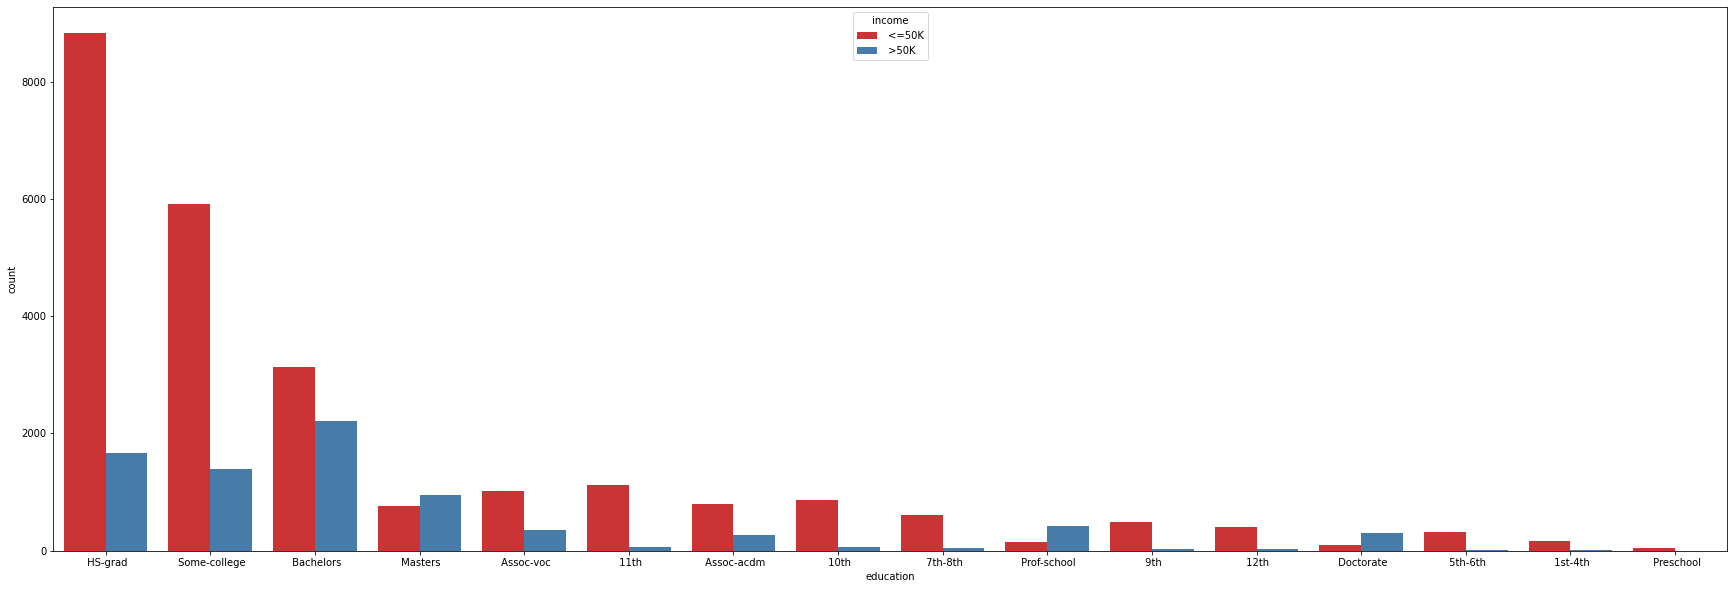

In [19]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'education', hue='income', data=df_census, order = df_census['education'].value_counts().index, palette = 'Set1');

## Distribuição de frequência

In [20]:
class Frequency_Distribution ():
  def __init__(self, df, column, num_class = -1, decimal_place = -1):
    self.df = df
    self.distribution_ = None
    self.num_class = num_class
    self.decimal_place = decimal_place
    self.column = column

    #1: Definir o número de classes
    self.k = math.ceil( math.sqrt( self.df.shape[0] ) ) if self.num_class == -1 else self.num_class

    #2: Calcular o intervalo de classe ou amplitude de classe
    self.Xmax = self.df[self.column].max()
    self.Xmin = self.df[self.column].min()
    self.AT = int(self.Xmax - self.Xmin) if self.decimal_place == -1 else round(self.Xmax - self.Xmin, self.decimal_place)
    self.h = round(self.AT/self.k, 2) if self.decimal_place == -1 else round(self.AT/self.k, self.decimal_place)

  def execute(self):
    #3: Construção da classes
    class_interval  = []
    class_frequency = {}
    class_min = self.Xmin
    for c in range(self.k): 
      interval = (round(class_min, 2) if self.decimal_place == -1 else round(class_min, self.decimal_place),
                  round(class_min+self.h, 2) if self.decimal_place == -1 else round(class_min+self.h, self.decimal_place))
      class_interval.append(interval)
      class_frequency[interval] = 0
      class_min += self.h

    #4: Frequência das Classes
    for value in self.df[self.column].values:
      for Cmin, Cmax in class_interval:
        if Cmin >= value and  value < Cmax:
          class_frequency[(Cmin, Cmax)] += 1
          break

    interval_list, frequency_list = [], []
    for i, f in class_frequency.items():
      interval_list.append(str(i))
      frequency_list.append(f)

    self.distribution_ = pd.DataFrame({'interval': interval_list, 'frequency': frequency_list})

### Distribuição de frequência do ganho e perda de capital (em Dólares)

In [21]:
distribution_gain = Frequency_Distribution(df_census, 'capital-gain')
distribution_gain.execute()
distribution_gain.distribution_.sort_values(by=['frequency'], ascending = False).head(20)

,interval,frequency
0,"(0, 552.48)",29849
14,"(7734.72, 8287.2)",544
28,"(15469.44, 16021.92)",352
6,"(3314.88, 3867.36)",231
8,"(4419.84, 4972.32)",196
10,"(5524.8, 6077.28)",178
7,"(3867.36, 4419.84)",152
4,"(2209.92, 2762.4)",130
5,"(2762.4, 3314.88)",121
9,"(4972.32, 5524.8)",104


In [22]:
distribution_loos = Frequency_Distribution(df_census, 'capital-loos')
distribution_loos.execute()
distribution_loos.distribution_.sort_values(by=['frequency'], ascending = False).head(20)

,interval,frequency
0,"(0, 24.07)",31042
83,"(1997.81, 2021.88)",209
80,"(1925.6, 1949.67)",202
79,"(1901.53, 1925.6)",159
67,"(1612.69, 1636.76)",95
73,"(1757.11, 1781.18)",70
70,"(1684.9, 1708.97)",62
77,"(1853.39, 1877.46)",52
62,"(1492.34, 1516.41)",51
101,"(2431.07, 2455.14)",49


### Distribuição de frequência da idade

In [23]:
distribution_age = Frequency_Distribution(df_census, 'age', num_class = 15, decimal_place = 0)
distribution_age.execute()

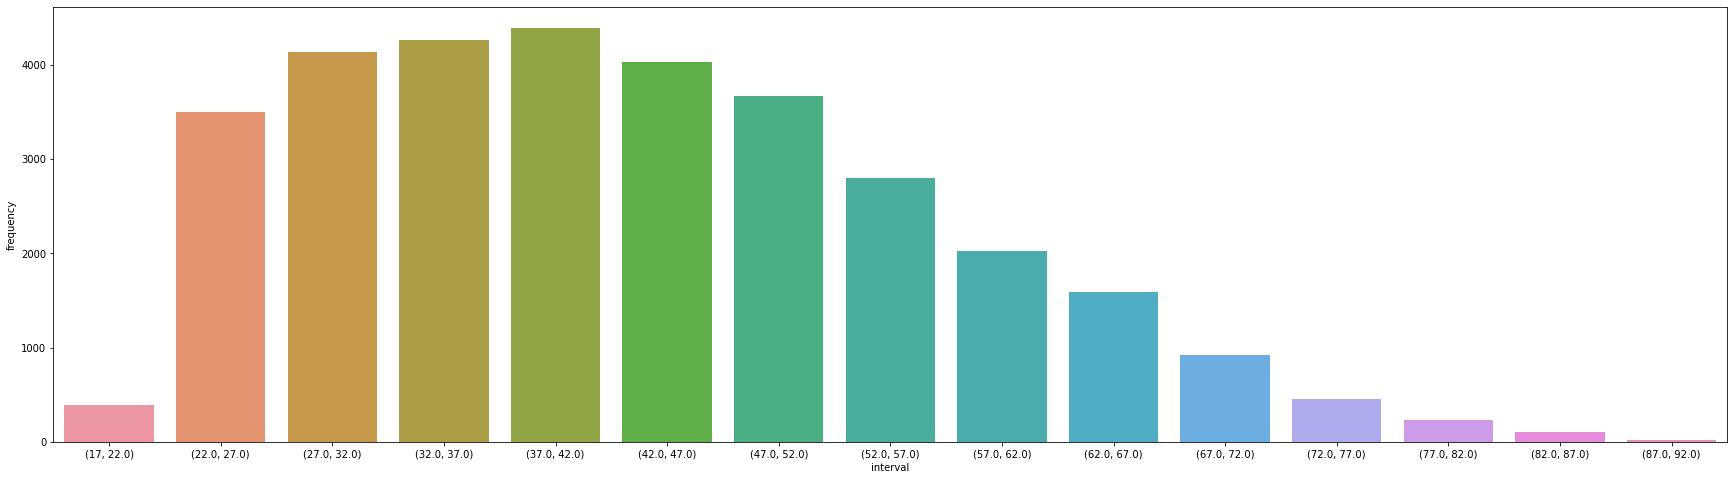

In [24]:
plt.figure(figsize = (30, 8))
ax = sns.barplot(x="interval", y="frequency", data=distribution_age.distribution_);

## Explorando relações entre gênero e renda

- Cerca de 31% dos homens ganham mais de 50.000 por ano
- Cerca de 11% das mulheres ganham mais de 50.000 por ano

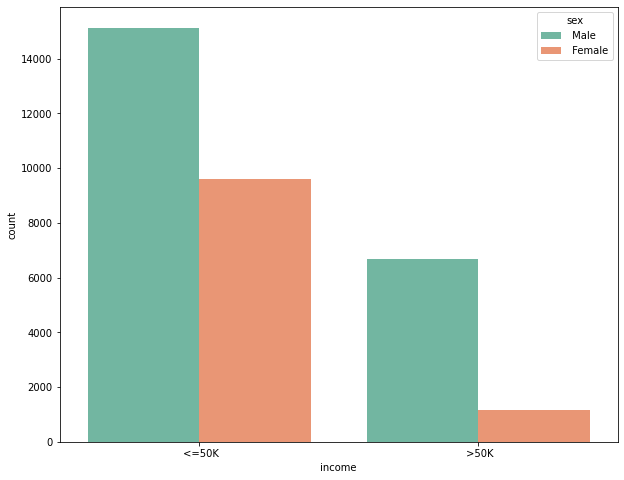

In [25]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x="income", hue="sex", data=df_census, palette = 'Set2');

- Algumas ocupações possuem uma diferença significativa na renda do indivíduo dependendo do gênero.

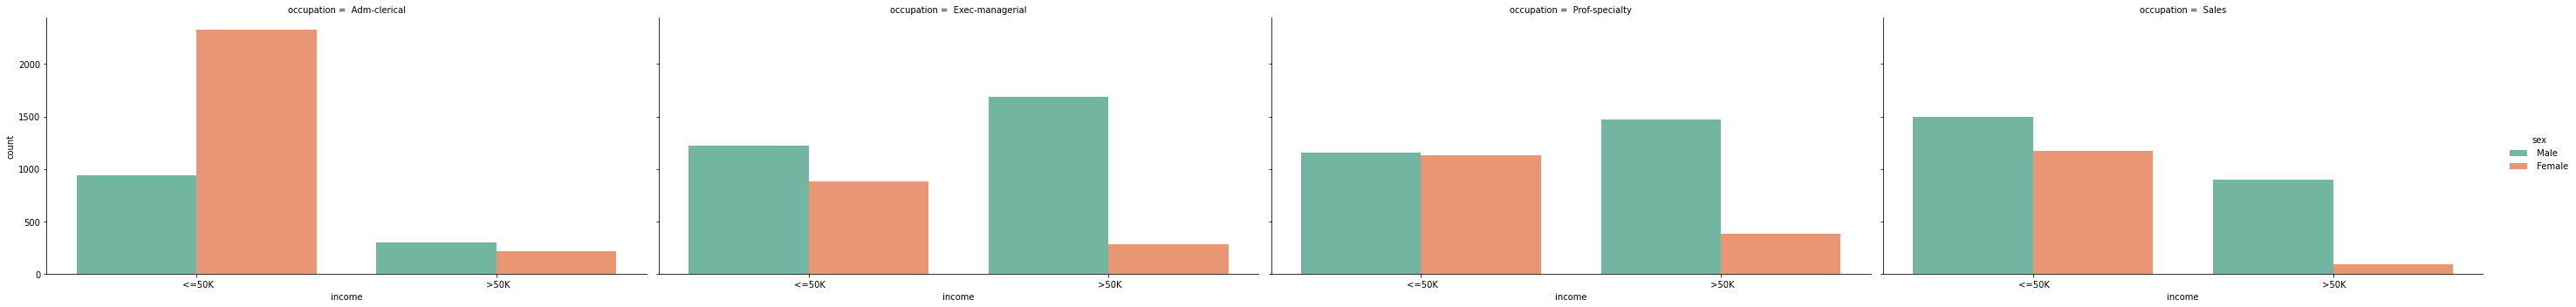

In [26]:
sns.catplot(x="income", hue="sex", col="occupation",
                data=df_census[ (df_census['occupation'] == ' Adm-clerical') | (df_census['occupation'] == ' Exec-managerial') | (df_census['occupation'] == ' Prof-specialty') | (df_census['occupation'] == ' Sales') ],
                height=5, aspect=2, palette = 'Set2', kind="count");

## Education e Education-num
É possível notar que a feature **education-num** é ordinal, o que pode ser útil e substituir a feature education.

In [27]:
df_census[['education', 'education-num']].drop_duplicates().sort_values(by=['education-num'])

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10
